### 머신러닝을 이용한 타이타닉 생존자 예측

### 타이타닉 데이터 DESC
타이타닉 데이터는 1912년 4월 15일에 침몰한 타이타닉호의 승객 정보를 담고 있는 데이터셋입니다.

타이타닉 데이터셋에는 승객들의 성별, 나이, 티켓 등급, 승선 항구, 가족 구성원 수, 요금 등 다양한 정보가 포함되어 있습니다. 또한, 승객들이 생존했는지 혹은 사망했는지를 나타내는 정보도 함께 제공됩니다.


타이타닉 데이터셋에는 다음과 같은 변수들이 포함되어 있습니다:

        PassengerId: 승객의 고유 식별번호
        Survived: 생존 여부 (0: 사망, 1: 생존)
        Pclass: 티켓 등급 (1: 1st class, 2: 2nd class, 3: 3rd class)
        Name: 승객의 이름
        Sex: 성별 (male: 남성, female: 여성)
        Age: 나이
        SibSp: 함께 탑승한 형제자매 또는 배우자의 수
        Parch: 함께 탑승한 부모나 자녀의 수
        Ticket: 티켓 번호
        Fare: 운임 요금
        Cabin: 객실 번호
        Embarked: 승선 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

----------

### EDA 분석

In [ ]:
#!pip install plotly_express

In [1]:
import pandas as pd 

titanic = pd.read_excel('titanic.xls')
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# %load ../set_matplotlib_hangul.py

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

path='C:/Windows/Fonts/malgun.ttf'
plt.rcParams['axes.unicode_minus'] = False

if platform.system()=="Darwin": #mac
    rc("font",family='Arial Unicodes MS')
    sns.set(font='Arial Unicodes MS', 
        rc={"axes.unicode_minus":False}),
    print('MAC Hangul OK')
elif platform.system()=="Windows":  #window
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)
    sns.set(font=font_name, 
    rc={"axes.unicode_minus":False})
    print('WIndow Hangul OK')
    
else:
    print('Unknown System')
    


WIndow Hangul OK


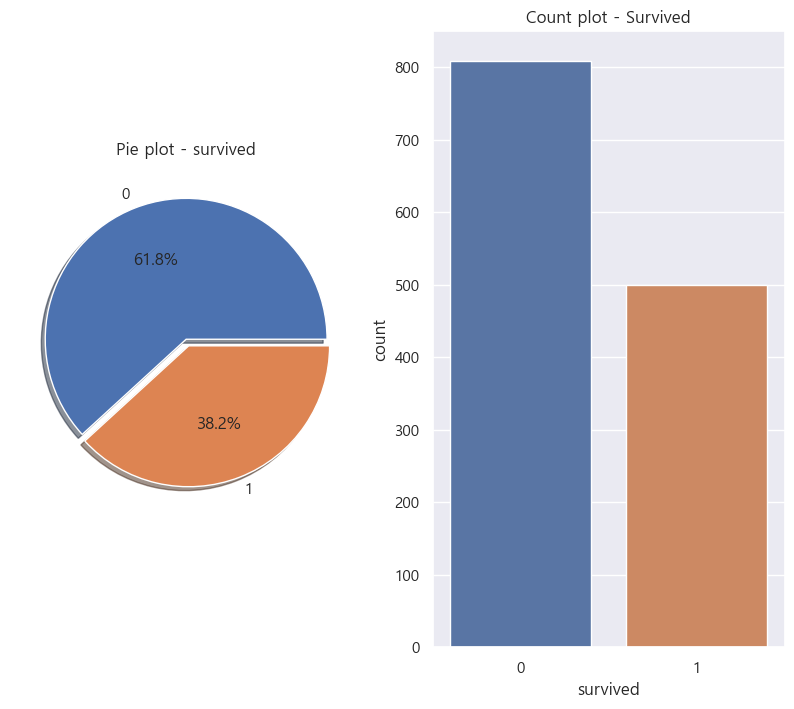

In [30]:
f, ax = plt.subplots(1, 2, figsize = (10, 8)) # 두 그래프 그리기 , 두 인자를 받아옴 , 행 : 1, 열 : 2 

titanic['survived'].value_counts().plot.pie(explode = [0, 0.05], # 각 조각 사이 거리 
                                            autopct='%1.1f%%', # 소숫점 까지 표시
                                            ax=ax[0], # 첫번째 위치에 그리기 
                                            shadow=True) 


ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('') 
sns.countplot(data=titanic, x='survived', ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

#### 성별에 따른 생존율
- 여성의 생존율이 남성 생존율의 두배 이상인걸로 보인다.  

Text(0.5, 1.0, 'Sex : Survived and Unservived')

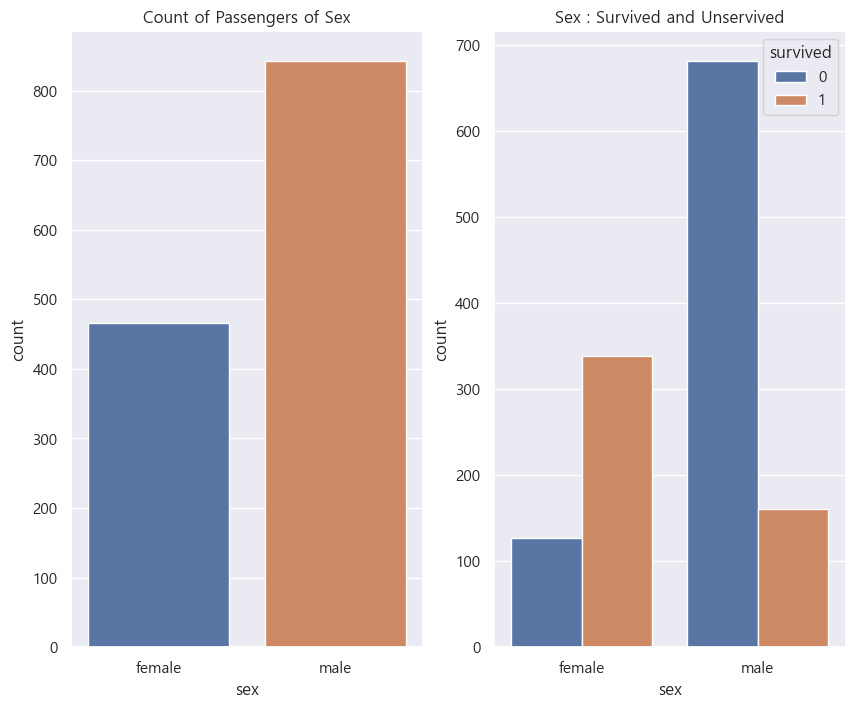

In [48]:
f, ax = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex : Survived and Unservived')



#### 경재력 대비 생존율
- 1등실의 생존률이 많다
- 그렇다면 여성이 1등실에 많이 탔을까?

In [50]:
pd.crosstab(titanic['pclass'],titanic['survived'], margins=True) # margin : 총계 

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


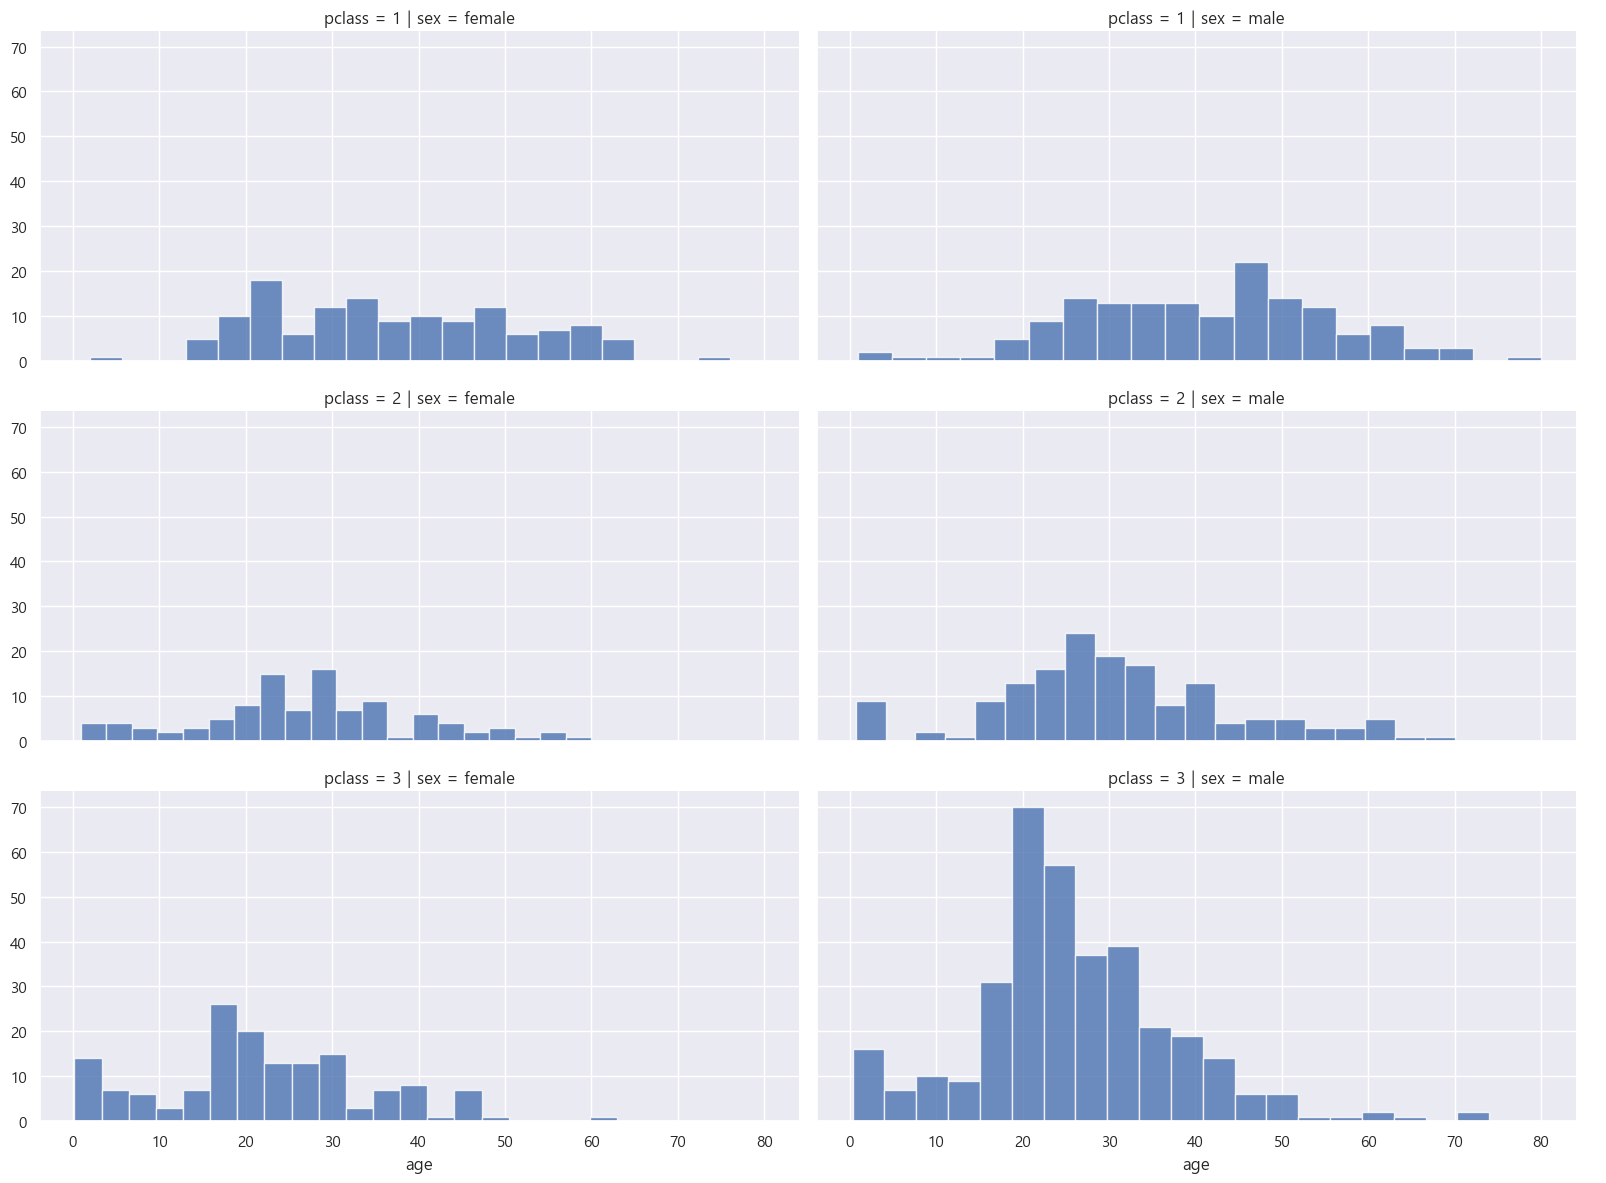

In [52]:
grid=sns.FacetGrid(titanic, row='pclass',col='sex', height=4, aspect=2) #height와 aspect 매개변수는 그리드의 높이와 가로 세로 비율을 설정
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

In [53]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

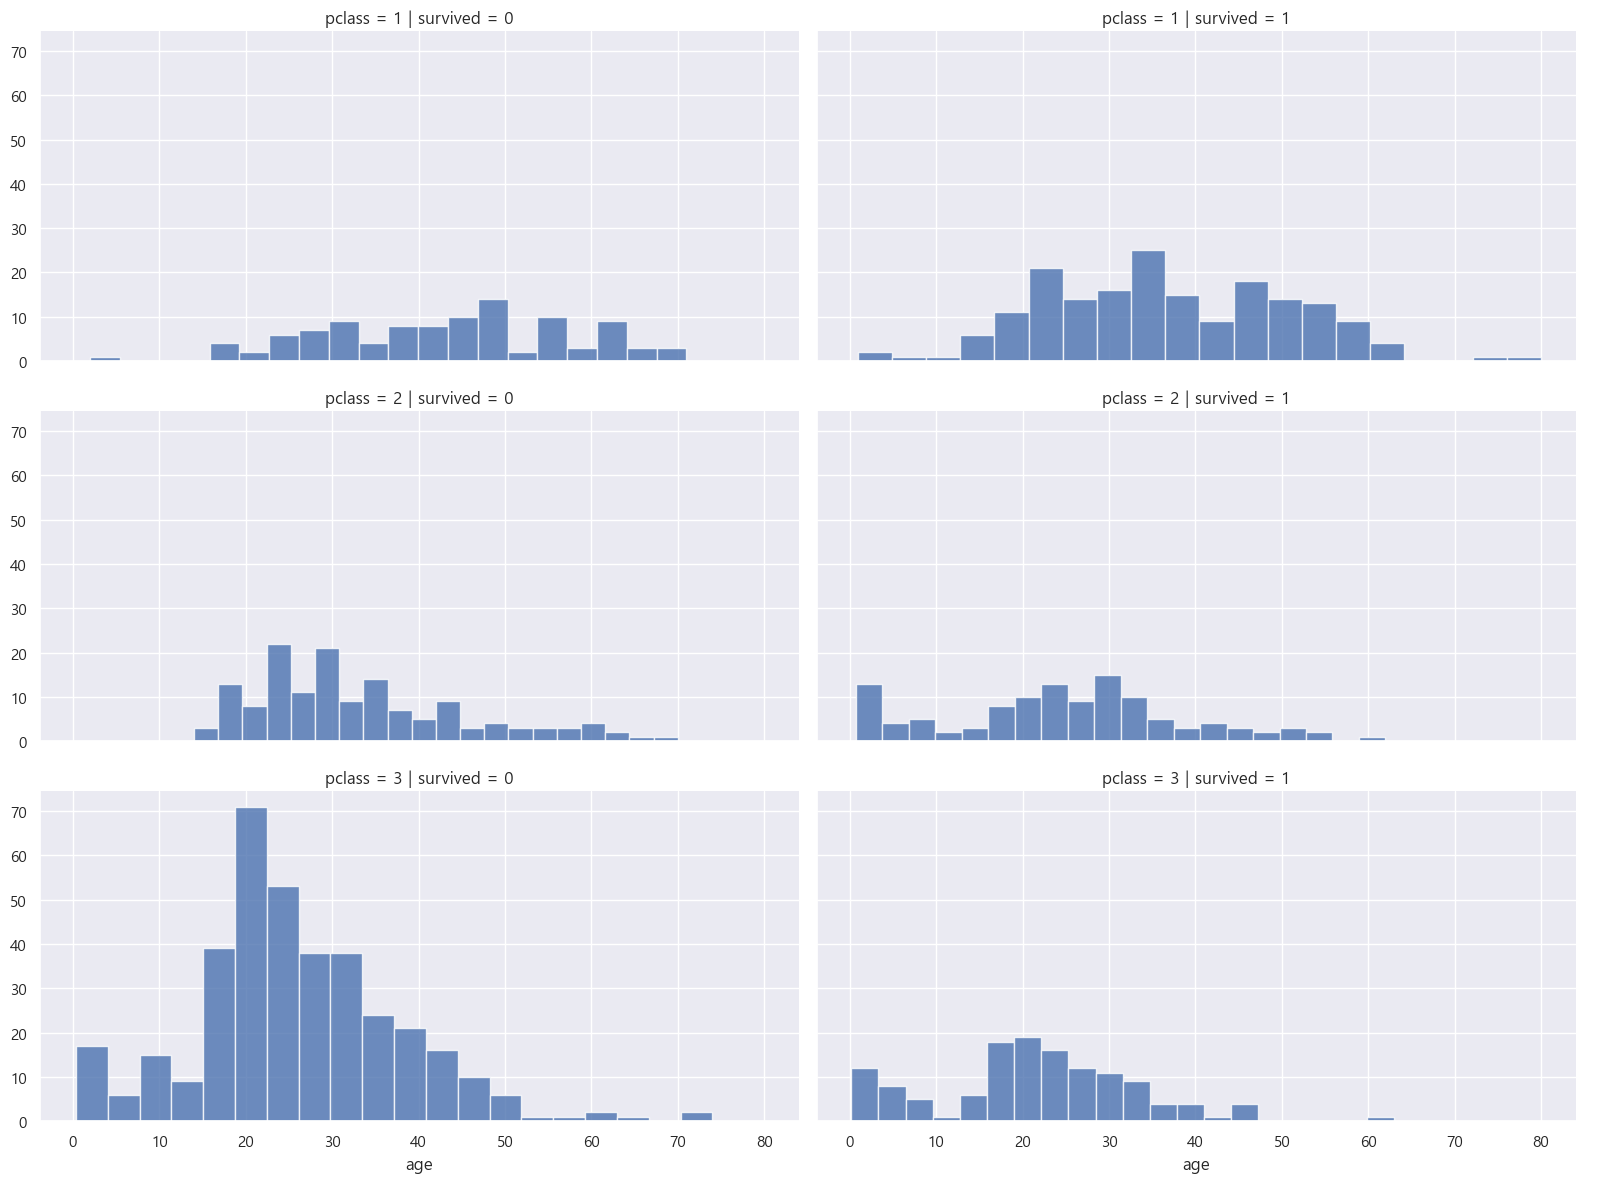

In [55]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

In [59]:
#  'age' 변수를 5개의 구간으로 나누어 각 승객의 나이 구간을 할당하는 코드
titanic['age_cut'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],# 나이 구간을 잡아줌
       include_lowest=True,
       labels=['baby','teen','young','adult','old']) 

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cut
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


#### 어리고, 여성이고 1등실일수록 생존하기 유리

<Axes: xlabel='sex', ylabel='survived'>

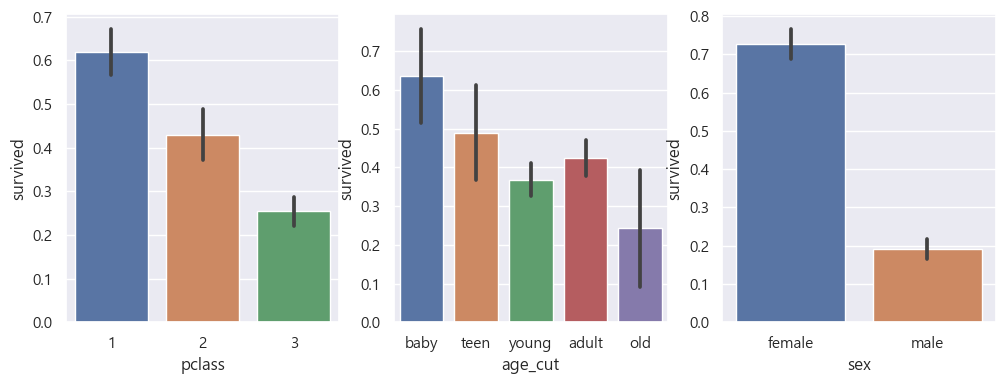

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(131) #1행3열 중 첫번째
sns.barplot(x='pclass', y='survived', data=titanic)
plt.subplot(132) #1행3열 중 두번째
sns.barplot(x='age_cut', y='survived', data=titanic)
plt.subplot(133) #1행3열 중 세번째
sns.barplot(x='sex', y='survived', data=titanic)




#### 남/녀 나이별 생존율 탐구

Text(0.5, 1.0, 'male')

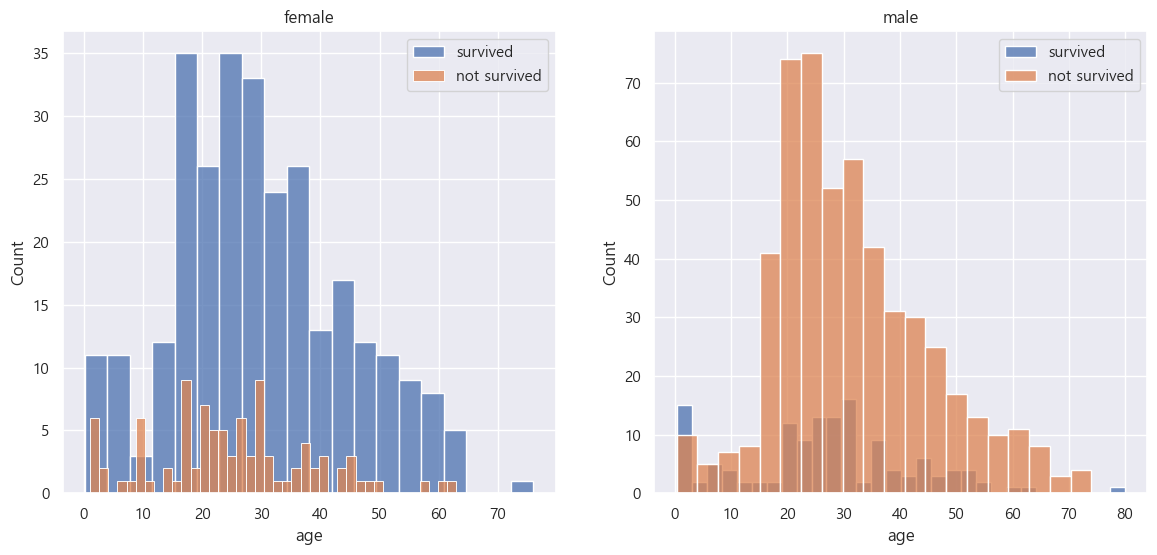

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

# bins는 x축 간격을, label은 범례에 표시될 이름을, ax는 해당 subplot을, kde는 히스토그램 위에 커널 밀도 추정선을 그리지 않도록 설정
ax = sns.histplot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], kde=False) 
ax = sns.histplot(women[women['survived']==0]['age'], bins=40, label='not survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('female')


ax = sns.histplot(men[men['survived']==1]['age'], bins=30, label='survived', ax=axes[1], kde=False) 
ax = sns.histplot(men[men['survived']==0]['age'], bins=20, label='not survived', ax=axes[1], kde=False)

ax.legend(); ax.set_title('male')

#### 탐승객의 이름에서 신분을 알수있다

In [93]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.',tmp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cut,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [94]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [95]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [100]:
titanic['title'] = titanic['title'].replace('Mlle','Miss')
titanic['title'] = titanic['title'].replace('Ms','Miss')
titanic['title'] = titanic['title'].replace('Mme','Mrs')

rare_f = ['Dona', 'Lady', 'the Countess']
rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']


In [101]:
for each in rare_f:
    titanic['title'] = titanic['title'].replace(each,'Rare_f')

for each in rare_m:
    titanic['title'] = titanic['title'].replace(each,'Rare_m')

In [102]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [104]:
titanic[['title','survived']].groupby(['title'],as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


### 머신러닝을 이용한 생존자 예측

In [107]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cut    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


#### 머신러닝을 위해 컬럼을 숫자로 변경

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit((titanic['sex'])) #문자를 숫자로 바꿔줌 

LabelEncoder()

In [110]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cut,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [113]:
# 결측치 확인
print(titanic.isnull().sum())

# 결측치는 제외해줌 
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]


pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       2
boat         628
body         926
home.dest    360
age_cut        0
title          0
gender         0
dtype: int64


In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cut    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


#### 상관관계

C:\Users\YUN\AppData\Local\Temp\ipykernel_11520\3909637462.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



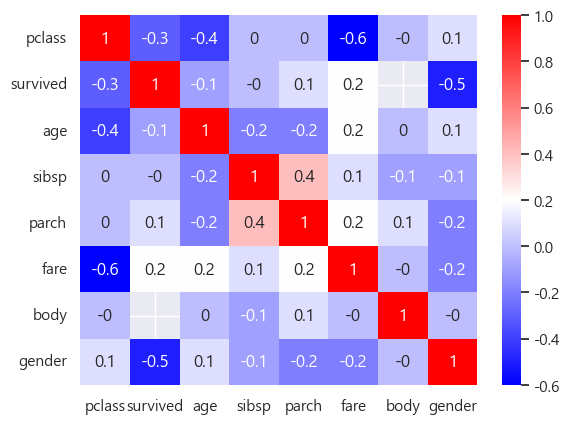

In [118]:
correlarion_matrix = titanic.corr().round(1)
sns.heatmap(data = correlarion_matrix ,annot=True, cmap='bwr');

In [119]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=13)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [122]:
pred = dt.predict(X_test)
print(accuracy_score(y_test,pred))


0.7896174863387978


#### 디카프리오는 생존할 수 있었을까?

In [131]:
import numpy as np

# titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
dicarprio = np.array([[3, 18, 0, 0, 5, 1 ]])
print( 'Dicarprio survived(%): ', dt.predict_proba(dicarprio)[0,1])

winslet = np.array([[1, 16, 1, 1, 100, 0 ]])
print( 'Winslet survived(%): ', dt.predict_proba(winslet)[0,1])

Dicarprio survived(%):  0.2236842105263158
Winslet survived(%):  1.0


c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

